In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
import pandas as pd
import matplotlib.pyplot as plt 
import math


from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree


import warnings
warnings.simplefilter(action='ignore')

## **Data Preparation**

In [2]:
ins_df = pd.read_csv("/content/DS3_C6_S1_Regression_Insurance_Data_Project.csv")
ins_df.head()

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520


In [3]:
ins_df.shape

(1338, 8)

In [4]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   classif   1330 non-null   object 
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [5]:
ins_df.isnull().sum()

age         0
sex         0
bmi         0
classif     8
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
in_df = ins_df.drop(['classif','region','children'],axis = 1)
in_df

,age,sex,bmi,smoker,charges
0,19,female,27.900,yes,16884.92400
1,18,male,33.770,no,1725.55230
2,28,male,33.000,no,4449.46200
3,0,male,22.705,no,21984.47061
4,32,male,28.880,no,3866.85520
...,...,...,...,...,...
1333,50,male,30.970,no,10600.54830
1334,18,female,31.920,no,2205.98080
1335,18,female,36.850,no,1629.83350
1336,21,female,25.800,no,2007.94500


In [7]:
in_df.describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.133782,30.663397,13270.422265
std,14.958658,6.098187,12110.011237
min,-58.000000,15.960000,1121.873900
25%,26.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,190.000000,53.130000,63770.428010


In [8]:
i_df= in_df[(in_df['age']>0)&(in_df['age']<100)]
i_df

,age,sex,bmi,smoker,charges
0,19,female,27.90,yes,16884.9240
1,18,male,33.77,no,1725.5523
2,28,male,33.00,no,4449.4620
4,32,male,28.88,no,3866.8552
5,31,female,25.74,no,3756.6216
...,...,...,...,...,...
1332,52,female,44.70,no,11411.6850
1333,50,male,30.97,no,10600.5483
1334,18,female,31.92,no,2205.9808
1335,18,female,36.85,no,1629.8335


## **Exploratory Data Analysis**

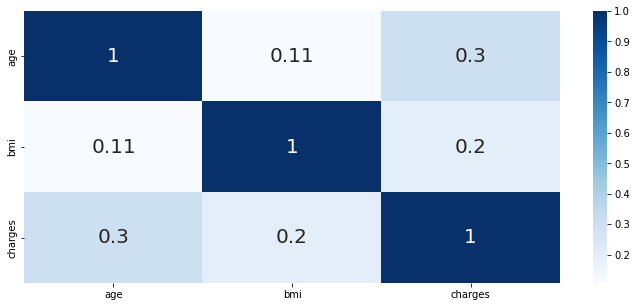

In [9]:
## Correlation matrix
fig= plt.figure(figsize = (12,5))
sns.heatmap(i_df.corr(), annot=True, cmap='Blues', annot_kws={'size': 20});

Correlation between BMI and Charges: 0.2006695984077036


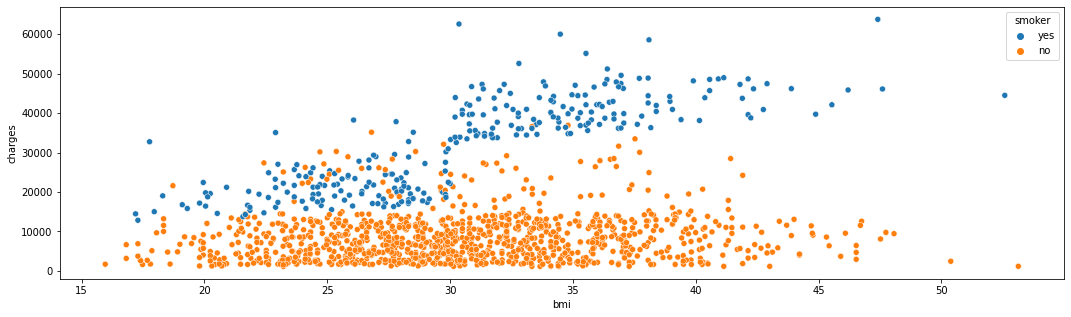

In [11]:
bc=i_df['bmi'].corr(i_df['charges'])
print("Correlation between BMI and Charges:", bc)
fig= plt.figure(figsize = (18,5))
sns.scatterplot(x="bmi", y="charges", hue="smoker", data=i_df, color='m');

Correlation between Age and Charges: 0.2982703166043161


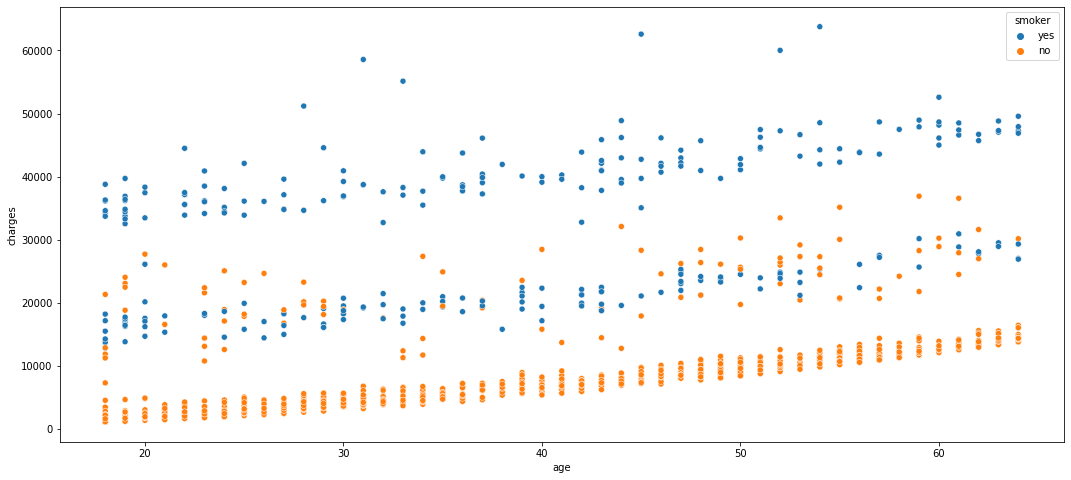

In [12]:
ac=i_df['age'].corr(i_df['charges'])
print("Correlation between Age and Charges:", ac)
fig= plt.figure(figsize = (18,8))
sns.scatterplot(x="age", y="charges", hue="smoker", data=i_df, color='g');

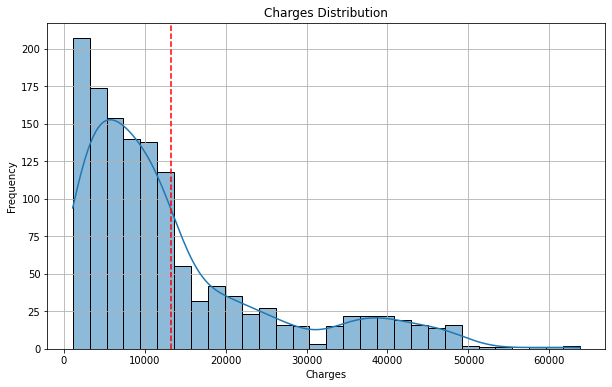

Mean: 13262.759398461367


In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(x='charges', data=i_df, kde=True)
plt.axvline(i_df.charges.mean(), color='r', linestyle='--', label='Mean')
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print(f'Mean: {(i_df["charges"].mean())}')

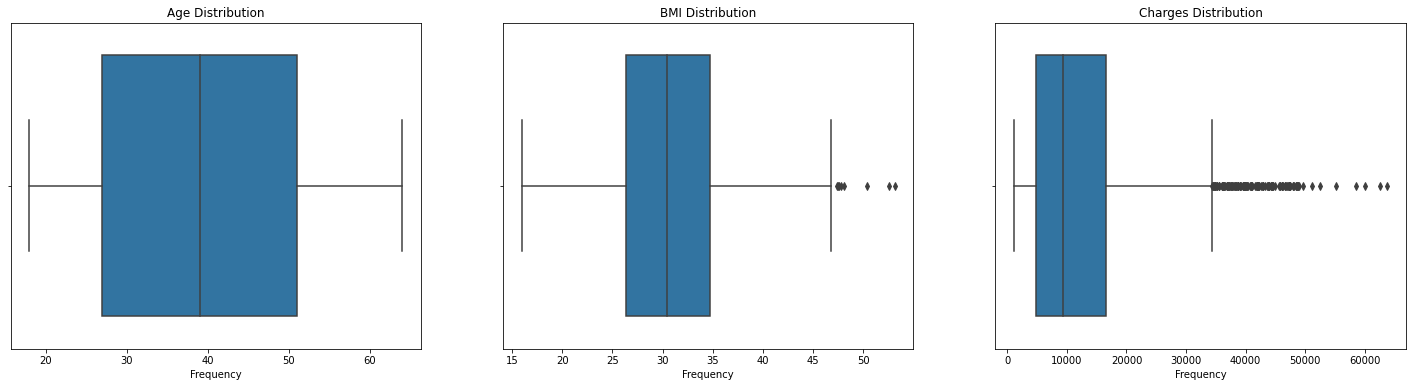

In [14]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='age', data=i_df)
plt.title('Age Distribution')
plt.xlabel('Frequency')
plt.subplot(1, 3, 2)
sns.boxplot(x='bmi', data=i_df)
plt.title('BMI Distribution')
plt.xlabel('Frequency')
plt.subplot(1, 3, 3)
sns.boxplot(x='charges', data=i_df)
plt.title('Charges Distribution')
plt.xlabel('Frequency')
plt.show()

## **Data Mining**

In [15]:
i_df

,age,sex,bmi,smoker,charges
0,19,female,27.90,yes,16884.9240
1,18,male,33.77,no,1725.5523
2,28,male,33.00,no,4449.4620
4,32,male,28.88,no,3866.8552
5,31,female,25.74,no,3756.6216
...,...,...,...,...,...
1332,52,female,44.70,no,11411.6850
1333,50,male,30.97,no,10600.5483
1334,18,female,31.92,no,2205.9808
1335,18,female,36.85,no,1629.8335


In [16]:
surviver_encoder = preprocessing.LabelEncoder()

surviver_encoder.fit(i_df.sex)
print(surviver_encoder.classes_)
i_df.sex= surviver_encoder.transform(i_df.sex)

surviver_encoder.fit(i_df.smoker)
print(surviver_encoder.classes_)
i_df.smoker= surviver_encoder.transform(i_df.smoker)


i_df

['female' 'male']
['no' 'yes']


,age,sex,bmi,smoker,charges
0,19,0,27.90,1,16884.9240
1,18,1,33.77,0,1725.5523
2,28,1,33.00,0,4449.4620
4,32,1,28.88,0,3866.8552
5,31,0,25.74,0,3756.6216
...,...,...,...,...,...
1332,52,0,44.70,0,11411.6850
1333,50,1,30.97,0,10600.5483
1334,18,0,31.92,0,2205.9808
1335,18,0,36.85,0,1629.8335


In [17]:
X = i_df.drop(['charges'], axis=1)
y = i_df[['charges']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.75,random_state=2)

In [18]:
X_train.shape,X_test.shape

((333, 4), (1000, 4))

- **Linear Regression**

In [19]:
reg_lin = LinearRegression()

reg_lin.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred_test=reg_lin.predict(X_test)
print("Predicted Values of TEST DEPENDENT:",y_pred_test)

Predicted Values of TEST DEPENDENT: [[ 1.07217482e+04]
 [ 4.30577373e+03]
 [ 9.67121696e+03]
 [ 1.77220984e+03]
 [ 1.63676455e+04]
 [ 6.04410389e+03]
 [ 1.17034099e+04]
 [ 1.06388669e+04]
 [ 1.06176056e+04]
 [ 3.76926730e+04]
 [ 3.11193217e+04]
 [ 1.12214516e+04]
 [ 4.36634717e+03]
 [ 6.74530280e+03]
 [ 5.00753089e+03]
 [ 9.20558755e+03]
 [ 2.46464394e+03]
 [ 3.38140043e+04]
 [ 1.05183860e+04]
 [ 1.55278071e+04]
 [ 2.85342463e+04]
 [ 7.12983578e+03]
 [ 3.72232111e+04]
 [ 3.34060377e+03]
 [ 1.33960855e+03]
 [ 9.38024942e+03]
 [ 1.34654537e+04]
 [ 9.96985796e+03]
 [ 1.28046773e+04]
 [ 1.53948988e+03]
 [ 1.32249888e+04]
 [ 5.64783080e+03]
 [ 8.95983014e+03]
 [ 3.86208480e+04]
 [ 2.72182021e+04]
 [ 6.89927103e+03]
 [ 2.79986653e+04]
 [ 7.54808256e+03]
 [-1.05248360e+03]
 [ 8.41140983e+03]
 [ 9.00431846e+03]
 [ 9.54163869e+03]
 [ 8.94009267e+03]
 [ 1.60496823e+04]
 [ 6.21476192e+03]
 [ 1.09568121e+04]
 [ 7.15143128e+03]
 [ 1.86344077e+03]
 [ 4.04272183e+03]
 [ 1.60913297e+04]
 [ 4.49760264e

In [21]:
y_pred_train=reg_lin.predict(X_train)
print("Predicted Values of TRAIN DEPENDENT:",y_pred_train)

Predicted Values of TRAIN DEPENDENT: [[37492.96304667]
 [27398.81456901]
 [14199.13036416]
 [ 1931.73243735]
 [34841.88488937]
 [12415.04046335]
 [ 8472.85843328]
 [33721.69147385]
 [ 3533.94786896]
 [ 3011.98232139]
 [ 9763.78223952]
 [10261.42941577]
 [ 2732.24062951]
 [28809.93941207]
 [ 6811.62873544]
 [ 7647.57267524]
 [12627.31922308]
 [26924.14123306]
 [ 7886.49567501]
 [ 9047.23730031]
 [ 9564.95613561]
 [ 5225.62585089]
 [30073.6780136 ]
 [ 7476.94134602]
 [ 4728.25780267]
 [ 4839.94722499]
 [ 4008.90033294]
 [31772.51596344]
 [10458.65932786]
 [ 9931.09542142]
 [ 7994.85830431]
 [15875.12811799]
 [29712.20928676]
 [10200.25129088]
 [ 6090.99985909]
 [11579.97168419]
 [ 9780.10249378]
 [13046.83740478]
 [11823.45753573]
 [28482.92356504]
 [13527.51565491]
 [  870.10273919]
 [ 5322.33878491]
 [30902.64281709]
 [ 3941.25733425]
 [ 7024.6835943 ]
 [ 7860.82565709]
 [29394.64226488]
 [13778.72837612]
 [ 7939.24319043]
 [ 6787.14835405]
 [ 3592.08697456]
 [ 6372.45486076]
 [ 4924.9

In [22]:
mae_t1 =  mean_absolute_error(y_train,y_pred_train)
r_score_t1 =  metrics.r2_score(y_train,y_pred_train)
print("MAE for Train Set:", mae_t1)
print("R2 Score for Train Set:",round(r_score_t1,2)*100,'%')

MAE for Train Set: 4407.572304883356
R2 Score for Train Set: 73.0 %


In [23]:
mae =  mean_absolute_error(y_test,y_pred_test)
r_score =  metrics.r2_score(y_test, y_pred_test)
print("MAE for Test Set:", mae)
print("R2 Score for Test Set:",round(r_score,2)*100,'%')

MAE for Test Set: 4384.851784663094
R2 Score for Test Set: 75.0 %


In [24]:
# from sklearn.linear_model import Ridge

# rid= Ridge(alpha = 1).fit(X_train, y_train)

# pred_train = rid.predict(X_train)
# pred_test = rid.predict(X_test)

In [25]:
# mae_t_1=  mean_absolute_error(y_train,pred_train)
# r_score_t_1 =  metrics.r2_score(y_train, pred_train)
# print("MAE for Train Set:",mae_t_1)
# print("R2 Score for Train Set:",round(r_score_t_1,2)*100,'%')

In [26]:
# maet_1=  mean_absolute_error(y_test,pred_test)
# r_scoret_1 =  metrics.r2_score(y_test, pred_test)
# print("MAE for Test Set:",maet_1)
# print("R2 Score for Test Set:",round(r_scoret_1,2)*100,'%')

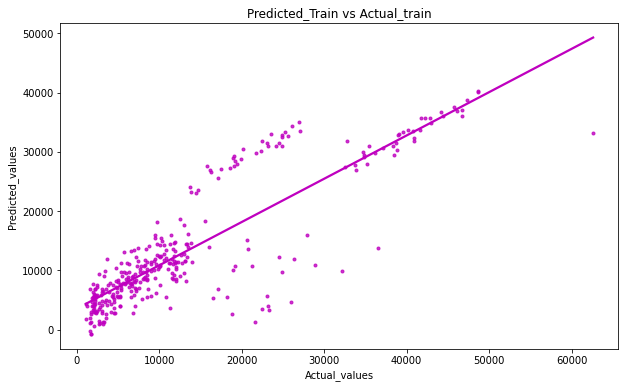

In [27]:
plt.figure(figsize=(10, 6))
sns.regplot(y_train,y_pred_train,ci=None,color='m',marker='.')
plt.xlabel('Actual_values')
plt.ylabel('Predicted_values')
plt.title('Predicted_Train vs Actual_train')
plt.show()

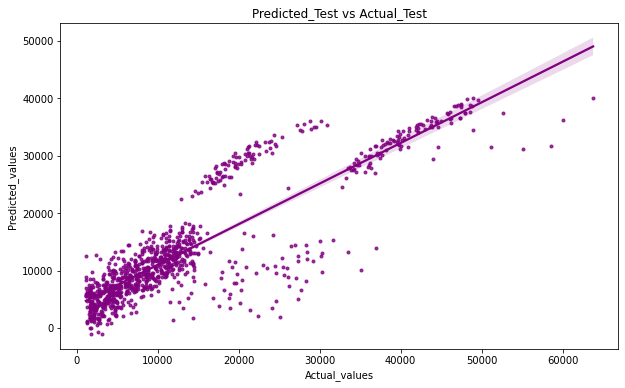

In [28]:
plt.figure(figsize=(10, 6))
sns.regplot(y_test,y_pred_test,color='purple',marker='.')
plt.xlabel('Actual_values')
plt.ylabel('Predicted_values')
plt.title('Predicted_Test vs Actual_Test')
plt.show()

- **Decision Tree Regression**

In [29]:
reg_dt = DecisionTreeRegressor(max_depth=3)

reg_dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [30]:
y_pred_test=reg_dt.predict(X_test)
print("Predicted Values of TEST DEPENDENT:",y_pred_test)

Predicted Values of TEST DEPENDENT: [11134.86997533  2496.53164933  6034.9968307   6034.9968307
 11134.86997533  6034.9968307  11134.86997533  6034.9968307
  6034.9968307  43897.125092   36436.88484278 17175.06766067
  6034.9968307   6034.9968307   6034.9968307   6034.9968307
  2496.53164933 36436.88484278 11134.86997533 17175.06766067
 36436.88484278  6034.9968307  43897.125092    6034.9968307
  2496.53164933 11134.86997533  6034.9968307   6034.9968307
 11134.86997533  6034.9968307  11134.86997533  6034.9968307
 11134.86997533 43897.125092   17574.92881389  6034.9968307
 36436.88484278 11134.86997533  6034.9968307   6034.9968307
 11134.86997533 11134.86997533 11134.86997533 17175.06766067
  2496.53164933 11134.86997533 11134.86997533  6034.9968307
  6034.9968307  17175.06766067  2496.53164933 11134.86997533
  6034.9968307   6034.9968307   6034.9968307  11134.86997533
  6034.9968307  17175.06766067 17175.06766067  6034.9968307
 17175.06766067  6034.9968307  11134.86997533  6034.9968307

In [31]:
y_pred_train=reg_dt.predict(X_train)
print("Predicted Values of TRAIN DEPENDENT:",y_pred_train)

Predicted Values of TRAIN DEPENDENT: [43897.125092   36436.88484278 11134.86997533  2496.53164933
 43897.125092   11134.86997533  6034.9968307  43897.125092
  6034.9968307   6034.9968307   6034.9968307  11134.86997533
  6034.9968307  17574.92881389  6034.9968307   6034.9968307
 11134.86997533 36436.88484278  6034.9968307   6034.9968307
 11134.86997533  6034.9968307  17574.92881389  6034.9968307
  6034.9968307   6034.9968307   6034.9968307  36436.88484278
  6034.9968307  11134.86997533  6034.9968307  11134.86997533
 24513.57745    11134.86997533 11134.86997533 11134.86997533
 11134.86997533  6034.9968307  11134.86997533 17574.92881389
 11134.86997533  6034.9968307   6034.9968307  36436.88484278
  6034.9968307   6034.9968307   6034.9968307  36436.88484278
 17175.06766067 11134.86997533  2496.53164933  6034.9968307
  6034.9968307   6034.9968307  11134.86997533  6034.9968307
 24513.57745    11134.86997533  6034.9968307   2496.53164933
 11134.86997533 11134.86997533 17574.92881389  6034.996

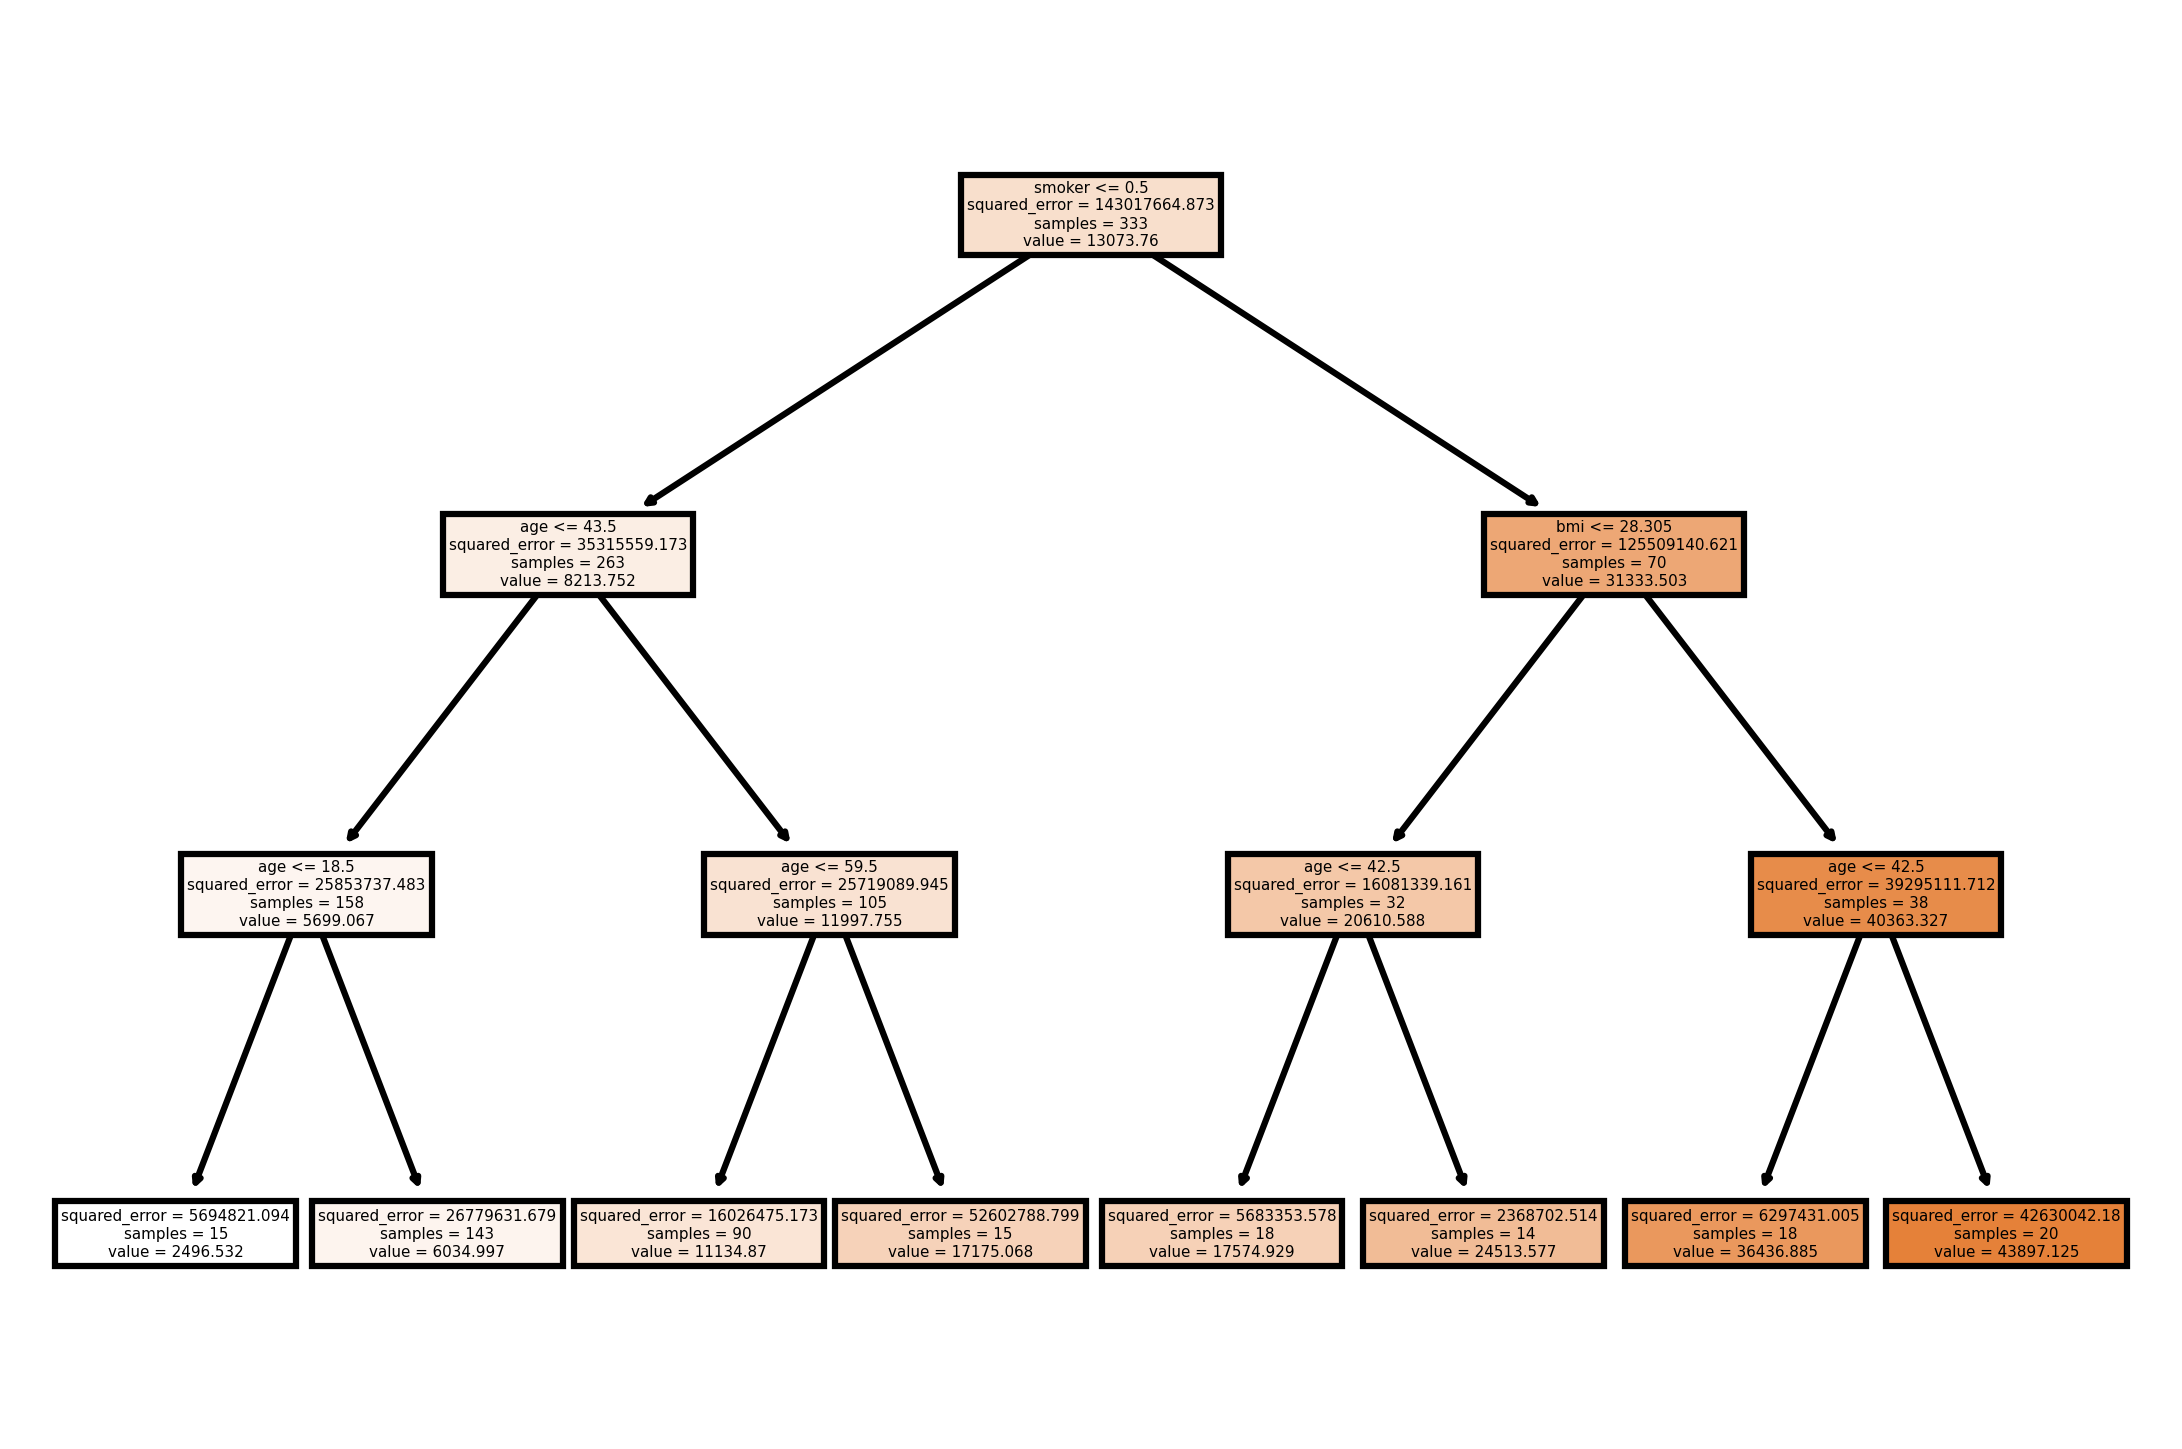

In [32]:
fig, axes = plt.subplots(dpi=450)

tree.plot_tree(reg_dt,feature_names = X.columns, filled = True);

In [33]:
mae1 =  mean_absolute_error(y_test,y_pred_test)
r_score1 =  metrics.r2_score(y_test, y_pred_test)
print("MAE for Test Set:", mae1)
print("R2 Score for Test Set:",round(r_score1,2)*100,'%')

MAE for Test Set: 3306.1666776032807
R2 Score for Test Set: 81.0 %


In [34]:
mae_t2 =  mean_absolute_error(y_train,y_pred_train)
r_score_t2 =  metrics.r2_score(y_train,y_pred_train)
print("MAE for Train Set:", mae_t2)
print("R2 Score for Train Set:",round(r_score_t2,2)*100,'%')

MAE for Train Set: 2872.503838662126
R2 Score for Train Set: 85.0 %


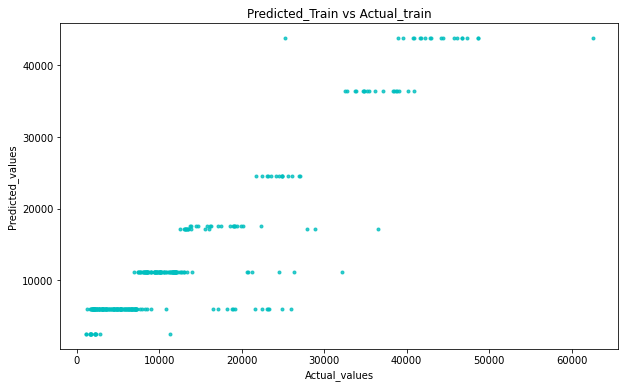

In [35]:
plt.figure(figsize=(10, 6))
sns.regplot(y_train,y_pred_train,color='c',marker='.',fit_reg = False)
plt.xlabel('Actual_values')
plt.ylabel('Predicted_values')
plt.title('Predicted_Train vs Actual_train')
plt.show()

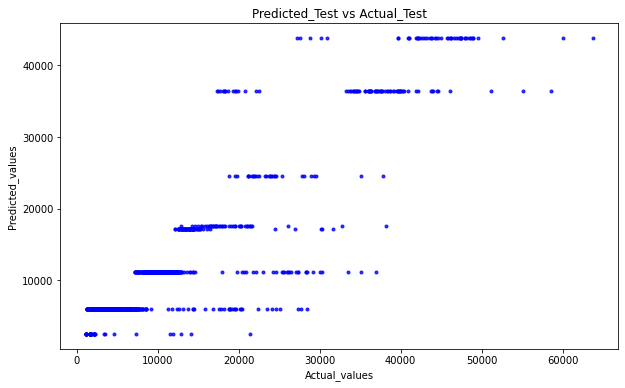

In [36]:
plt.figure(figsize=(10, 6))
sns.regplot(y_test,y_pred_test,color='b',marker='.',fit_reg = False)
plt.xlabel('Actual_values')
plt.ylabel('Predicted_values')
plt.title('Predicted_Test vs Actual_Test')
plt.show()

- **Random Forest Regression**

In [37]:
reg_rf = RandomForestRegressor()

reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [38]:
y_pred_test=reg_rf.predict(X_test)
print("Predicted Values of TEST DEPENDENT:",y_pred_test)

Predicted Values of TEST DEPENDENT: [10443.6483377  3105.2335787  3441.1176034  3594.4433102 12776.9144955
  4670.3214095 13058.8319936  7199.6430569  6621.8020515 44753.083835
 39542.3928565 13845.7147331 10068.9057164  4975.5981685  4532.8697896
  6901.6213216  7835.2880978 39723.3298755  9967.4695254 18976.183279
 28885.7355459  6414.686718  41475.6116035  4545.027653   2828.3293484
  9559.5704667  7003.8660299  6757.0451947 16506.1671438  3536.0084251
 12748.1771352  4562.766645   8686.9698519 46365.812749  16717.703774
  4625.7604628 35761.457725   9201.2122547  2354.2284983  5639.2227771
 16115.9970497 12031.03586    8686.9698519 19013.6490812  2496.1013008
 13668.3415121  8957.9226259  2533.9372989  3525.1757934 14720.9120455
  2638.4878894 12563.5930802  3039.8684528  6136.0978708  4693.9954917
  9533.1265547  5079.855572  15330.8814768 15501.9404499  6126.3637343
 18009.3965691  7766.617873   9717.8938459  9005.2363382 18239.3301705
 13985.3548061 10342.9693462 11413.3954235 4

In [39]:
y_pred_train=reg_rf.predict(X_train)
print("Predicted Values of TRAIN DEPENDENT:",y_pred_train)

Predicted Values of TRAIN DEPENDENT: [44977.085298  33840.9536847 10820.4410606  3315.0120678 42358.9533564
 11375.1178208  6574.5067207 42831.829764  16317.7206973  4513.7600895
  6863.4386705 11824.203591   6897.8251263 20478.9621159  3351.160001
  6026.8960187 12692.9105855 34746.225701   6358.9876035  3187.861454
 11125.6548302  4576.2274595 21559.360224   4533.3131073 18235.5882341
  3831.5282485  4572.172152  29896.1028491  5523.9632187 23184.8764081
  6179.1602875 10863.8249155 21610.7323088  9900.0883504 10234.9459741
  9727.0141421  8597.9096974  6092.869692  10481.3476912 18722.0650185
 16447.8806036  7126.2842312 10748.123495  36271.3347805  3347.8091018
  6964.6909015  6506.057224  37793.246682  28453.5561202  9708.0671831
  1907.5463045  8051.0595158  3981.6328943  4383.072002   9190.1926034
  2329.8274108 24827.9555049  8222.1186     4642.9402565  1906.9852264
 11835.9222333 12107.5759694 17854.8383025  3663.7795411  8647.992414
 16416.5633306  6953.5017748 16573.1997909 

In [40]:
mae2 =  mean_absolute_error(y_test,y_pred_test)
r_score2 =  metrics.r2_score(y_test, y_pred_test)
print("MAE for Test Set:", mae2)
print("R2 Score for Test Set:",round(r_score2,2)*100,'%')

MAE for Test Set: 2991.1456697105978
R2 Score for Test Set: 82.0 %


In [41]:
mae_t3 =  mean_absolute_error(y_train,y_pred_train)
r_score_t3 =  metrics.r2_score(y_train,y_pred_train)
print("MAE for Train Set:", mae_t3)
print("R2 Score for Train Set:",round(r_score_t3,2)*100,'%')

MAE for Train Set: 1141.5024006405406
R2 Score for Train Set: 97.0 %


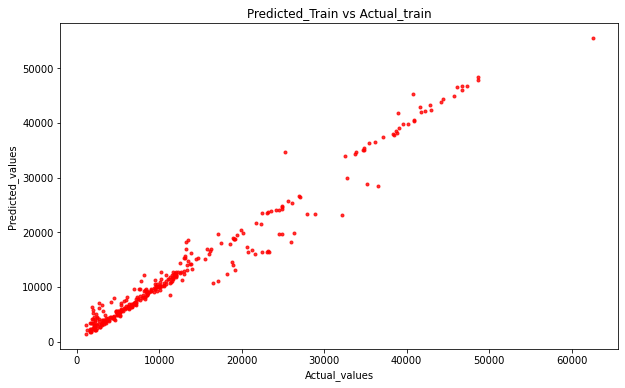

In [42]:
plt.figure(figsize=(10, 6))
sns.regplot(y_train,y_pred_train,color='r',marker='.',fit_reg = False)
plt.xlabel('Actual_values')
plt.ylabel('Predicted_values')
plt.title('Predicted_Train vs Actual_train')
plt.show()

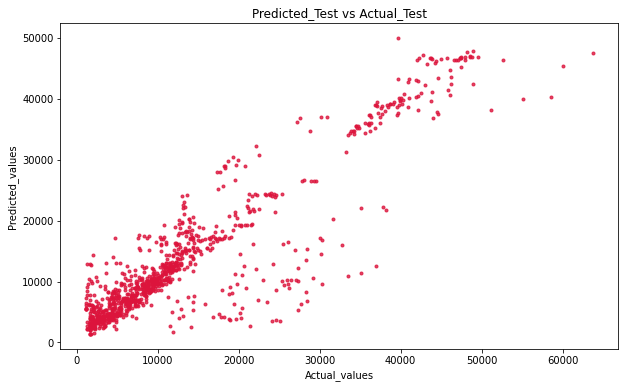

In [43]:
plt.figure(figsize=(10, 6))
sns.regplot(y_test,y_pred_test,color='crimson',marker='.',fit_reg = False)
plt.xlabel('Actual_values')
plt.ylabel('Predicted_values')
plt.title('Predicted_Test vs Actual_Test')
plt.show()

- **AdaBoost Regression**

In [44]:
reg_ada = AdaBoostRegressor()

reg_ada.fit(X_train,y_train)

AdaBoostRegressor()

In [45]:
y_pred_test=reg_ada.predict(X_test)
print("Predicted Values of TEST DEPENDENT:",y_pred_test)

Predicted Values of TEST DEPENDENT: [16002.37938346 10177.94223915 11674.97224962 11727.17260635
 16002.37938346 11674.97224962 16002.37938346 12208.69065451
 12208.69065451 43013.00183333 37237.2976     18045.84314571
 11757.29810176 10422.17205356 11674.97224962 12208.69065451
 10177.94223915 37867.99412069 16969.8779128  19304.89790318
 28672.40609364 10422.17205356 40206.90980192 11727.17260635
 10263.4548572  16002.37938346 13503.86653431 13473.31091851
 16969.8779128  11727.17260635 16002.37938346 11674.97224962
 16002.37938346 42805.42927692 18581.18394167 11360.21204219
 37237.2976     16002.37938346 11360.21204219 12208.69065451
 16002.37938346 16002.37938346 16002.37938346 19304.89790318
  9565.92586963 16002.37938346 16002.37938346 11360.21204219
 11674.97224962 18045.84314571  9565.92586963 16002.37938346
 11674.97224962 11360.21204219 11674.97224962 16002.37938346
 11360.21204219 18045.84314571 18045.84314571 11727.17260635
 19304.89790318 12208.69065451 16969.8779128  122

In [46]:
y_pred_train=reg_ada.predict(X_train)
print("Predicted Values of TRAIN DEPENDENT:",y_pred_train)

Predicted Values of TRAIN DEPENDENT: [43013.00183333 36713.00254875 16517.83771462 10177.94223915
 40206.90980192 16969.8779128  10422.17205356 43013.00183333
 10422.17205356 11727.17260635 13473.31091851 16002.37938346
 11674.97224962 24154.57279615 11360.21204219 10422.17205356
 16969.8779128  37237.2976     12208.69065451 11360.21204219
 16002.37938346 11674.97224962 24154.57279615 11757.29810176
 12850.78244807 11757.29810176 11674.97224962 27692.57371333
 11674.97224962 16969.8779128  10422.17205356 16002.37938346
 24154.57279615 16969.8779128  16002.37938346 16969.8779128
 16002.37938346 13503.86653431 16002.37938346 19490.07785
 17438.45116057 11727.17260635 11757.29810176 37237.2976
 10422.17205356 10422.17205356 10422.17205356 37237.2976
 23829.39485    16002.37938346  9565.92586963 11757.29810176
 11757.29810176 11674.97224962 16002.37938346 11356.59065072
 24546.19599059 16969.8779128  11727.17260635 10263.4548572
 16969.8779128  16969.8779128  19199.944      11727.17260635


In [47]:
mae3 =  mean_absolute_error(y_test,y_pred_test)
r_score3 =  metrics.r2_score(y_test, y_pred_test)
print("MAE for Test Set:", mae3)
print("R2 Score for Test Set:",round(r_score3,2)*100,'%')

MAE for Test Set: 6212.154727644169
R2 Score for Test Set: 68.0 %


In [48]:
mae_t4 =  mean_absolute_error(y_train,y_pred_train)
r_score_t4 =  metrics.r2_score(y_train,y_pred_train)
print("MAE for Train Set:", mae_t4)
print("R2 Score for Train Set:",round(r_score_t4,2)*100,'%')

MAE for Train Set: 5890.054158220226
R2 Score for Train Set: 70.0 %


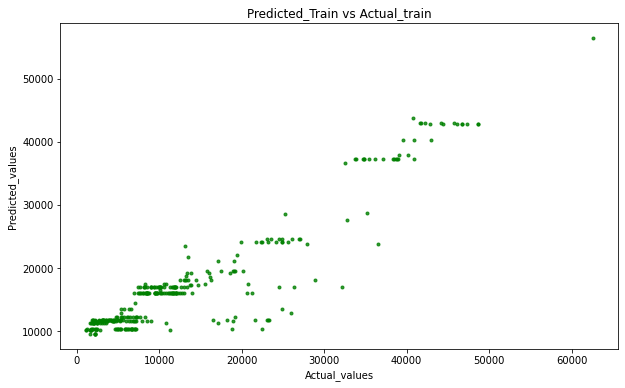

In [49]:
plt.figure(figsize=(10, 6))
sns.regplot(y_train,y_pred_train,color='green',marker='.',fit_reg = False)
plt.xlabel('Actual_values')
plt.ylabel('Predicted_values')
plt.title('Predicted_Train vs Actual_train')
plt.show()

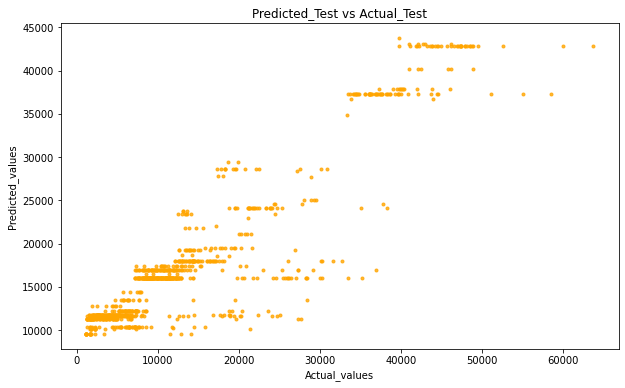

In [50]:
plt.figure(figsize=(10, 6))
sns.regplot(y_test,y_pred_test,color='orange',marker='.',fit_reg = False)
plt.xlabel('Actual_values')
plt.ylabel('Predicted_values')
plt.title('Predicted_Test vs Actual_Test')
plt.show()

- **Comparing all the alogrithms**

In [51]:
model_result = [['MAE',mae, mae1, mae2, mae3],
                ['R2', r_score, r_score1, r_score2, r_score3]]

In [52]:
score = pd.DataFrame(model_result, columns=['Scores','Linear_Reg','Decision_Tree','Random_Forest','AdaBoost'])
score

,Scores,Linear_Reg,Decision_Tree,Random_Forest,AdaBoost
0,MAE,4384.851785,3306.166678,2991.145670,6212.154728
1,R2,0.746561,0.805717,0.823723,0.676711


- **Checking Important The Feature**

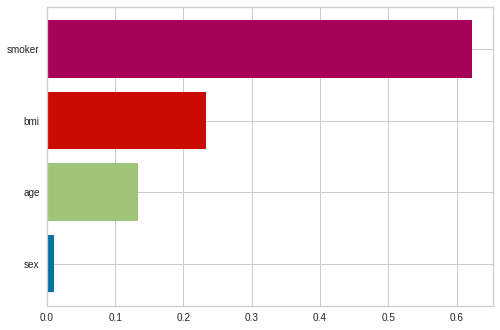

In [53]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(reg_rf,relative=False)

viz.fit(X_train, y_train);

- **Predicting Insurance Premium**

In [54]:
X_test = i_df.drop(columns=['charges'])

pred = reg_rf.predict(X_test)

predictions = i_df.copy()
predictions['Insurance_Pred'] = pred
predictions

,age,sex,bmi,smoker,charges,Insurance_Pred
0,19,0,27.90,1,16884.9240,17418.813282
1,18,1,33.77,0,1725.5523,6151.411868
2,28,1,33.00,0,4449.4620,8500.540398
4,32,1,28.88,0,3866.8552,4786.633722
5,31,0,25.74,0,3756.6216,4333.564789
...,...,...,...,...,...,...
1332,52,0,44.70,0,11411.6850,10863.824916
1333,50,1,30.97,0,10600.5483,10171.426202
1334,18,0,31.92,0,2205.9808,2646.743653
1335,18,0,36.85,0,1629.8335,2163.439193


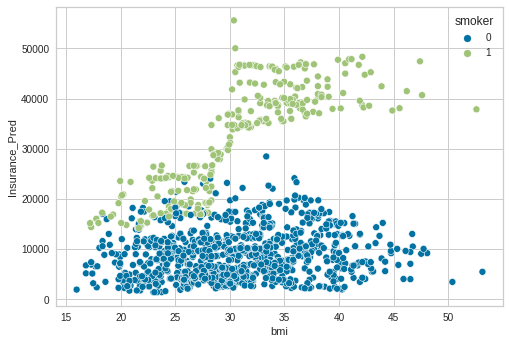

In [62]:
sns.scatterplot('bmi','Insurance_Pred',hue = 'smoker',data = predictions);

## **Conclusion**
- From the charges distribution in EDA, the average client has insurance costs of around 13,279. Although there are some extreme values (outLiers) like 60,000.

- Predicted accuracy values for training and testing datasets for each of the different algorithms used are almost similar.

- From the score table it can be concluded that Random Forest Regressor is the best fit for the model as it has good MAE and R^2 scores.

- Best feature is Smoker followed by BMI.

- From the final table it can concluded that insurance companies may charge more insurance premium if the customer is a smoker and to customers with high bmi and might charge less if they are non-smokers and customers with normal bmi.